In [1]:
%matplotlib inline

import pickle
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import structure

In [2]:
##################################
# if you want to load the object #
##################################

try:
    PATH = '/Users/maxwellclarke/Documents/data/fma_metadata/segmented'
    os.chdir(PATH)
except:
    PATH = r'C:\Users\james\Documents\data\fma_metadata\segmented'
    os.chdir(PATH)
    
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)
    
dfs = data.segmented_dfs # already sorted data

In [3]:
import re

r = re.compile('.*mean')
q = re.compile('.*std')

to_concat = [df for key, df in dfs['features'].items() if (bool(r.match(key)) | bool(q.match(key)))] # means and stds dfs
to_concat_feats = [key for key, df in dfs['features'].items() if (bool(r.match(key)) | bool(q.match(key)))]

df = pd.concat(to_concat +[data.tracks.track[['genre_top']]], axis=1, join='inner')

mask = df['genre_top'].isin(['Rock', 'Electronic', 'Hip-Hop', 'Folk', 'Classical'])

print(df.shape)
df = df[mask]
print(df.shape)


(91214, 149)
(25019, 149)


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split


X = df.drop('genre_top', axis=1)
y = df['genre_top']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2, stratify=y)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

lr_pipe = Pipeline([
    ('std_scl', StandardScaler()),
    ('lr', LogisticRegression())
])

lr_pipe.fit(X_train, y_train)
y_train_pred = lr_pipe.predict(X_train)
y_test_pred = lr_pipe.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [6]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

cm_train = np.round(np.array([row / sum(row) for row in cm_train]), 3)
cm_test = np.round(np.array([row / sum(row) for row in cm_test]), 3)

print('train score:\t', np.round(train_score, 4))
print('test score:\t', np.round(test_score, 4))

train score:	 0.7944
test score:	 0.7946


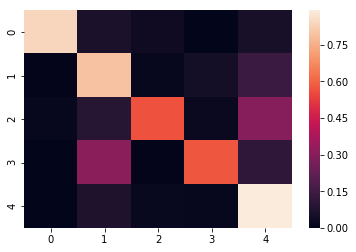

In [7]:
import seaborn as sns

sns.heatmap(cm_train) # training set confusion matrix

In [33]:
set(y)

{'Classical', 'Electronic', 'Folk', 'Hip-Hop', 'Rock'}

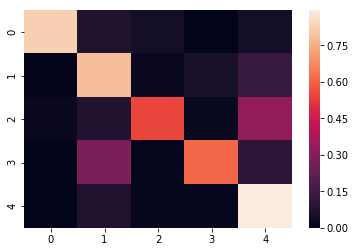

In [8]:
sns.heatmap(cm_test) # testing set confusiong matrix

In [9]:
print('training confusion matrix')
print(cm_train)
print('\ntesting confusion matrix')
print(cm_test)

training confusion matrix
[[0.84  0.063 0.037 0.002 0.058]
 [0.006 0.796 0.016 0.046 0.136]
 [0.014 0.091 0.569 0.024 0.302]
 [0.    0.308 0.005 0.576 0.11 ]
 [0.002 0.072 0.02  0.014 0.891]]

testing confusion matrix
[[0.827 0.077 0.048 0.    0.048]
 [0.005 0.786 0.021 0.057 0.131]
 [0.021 0.082 0.551 0.019 0.327]
 [0.    0.279 0.01  0.609 0.102]
 [0.001 0.074 0.016 0.015 0.894]]


Above you can see that the class imbalance of having many more Rock and Electronic tracks is causing them to overpower some of the smaller genres, with the exception of Classical, which I assume is distinct enough so that there is clearer separation.

In [35]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_pred, average='weighted')

0.7905318828173143

In [10]:
lr_pipe.fit(X, y)
y_pred = lr_pipe.predict(X)

full_score = accuracy_score(y, y_pred)
print(full_score)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7973140413285903
